# Network Value to Transaction Ratio (NVT)
## NVT = Network Value / Daily Transaction Value
--- 
compares the network value (market cap) of a network against daily transaction value 

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Setup API

In [2]:
import cryptocompare
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# environment variable API key setup
CRYPTOCOMPARE_API_KEY = os.getenv('CRYPTOCOMPARE_KEY')

# manually set API key
# cryptocompare.cryptocompare._set_api_key_parameter(KEY_HERE)

## Get Data

In [4]:
def calc_nvt(symbol):
    
    # pull data
    url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?api_key=' + CRYPTOCOMPARE_API_KEY + '&limit=2000&fsym=' + symbol
    data = requests.get(url).json()["Data"]["Data"]
    df = pd.DataFrame(data)
    
    # calculate
    df['nvt'] = df['current_supply']/df['transaction_count']/df['average_transaction_value']
    
    # pull pricing data
    price_url = 'https://min-api.cryptocompare.com/data/v2/histoday?tsym=USD&limit=2000&api_key=' + CRYPTOCOMPARE_API_KEY + '&fsym=' + symbol
    historical_data = requests.get(price_url).json()["Data"]["Data"]
    
    df_price = pd.DataFrame(historical_data)
    
    combined = df.set_index('time').join(df_price.set_index('time'), on='time')
    
    combined.index = pd.to_datetime(combined.index, unit = 's')
    
    return combined

In [5]:
btc_df = calc_nvt('BTC')

eth_df = calc_nvt('ETH')
eth_df.head()

,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,...,current_supply,nvt,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,,,,,,,,,,,,,,
2016-04-01,7605,ETH,27085,142666,1086,11104,33286,2913937,5,11.567304,...,7.867141e+07,204.325781,11.85,11.33,11.34,977172.18,11351944.06,11.62,multiply,BTC
2016-04-02,7605,ETH,27331,143781,1115,11010,29332,2943269,3,12.821353,...,7.870249e+07,209.272865,11.70,11.31,11.62,696411.87,8029594.39,11.53,multiply,BTC
2016-04-03,7605,ETH,27496,144730,949,10976,29577,2972846,1,7.439468,...,7.873422e+07,357.822416,11.69,11.41,11.53,422948.81,4877670.35,11.53,multiply,BTC
2016-04-04,7605,ETH,27829,145936,1206,11849,34527,3007373,2,13.049426,...,7.876617e+07,174.819335,11.59,10.99,11.53,698392.28,7763634.69,11.12,multiply,BTC
2016-04-05,7605,ETH,28088,147139,1203,12302,39098,3046471,11,17.694468,...,7.879775e+07,113.899482,11.26,10.05,11.12,1605929.49,16620015.46,10.35,multiply,BTC


<AxesSubplot:title={'center':'ETH Network Value to Transactions Ratio (NVT)'}, xlabel='Years', ylabel='NVT'>

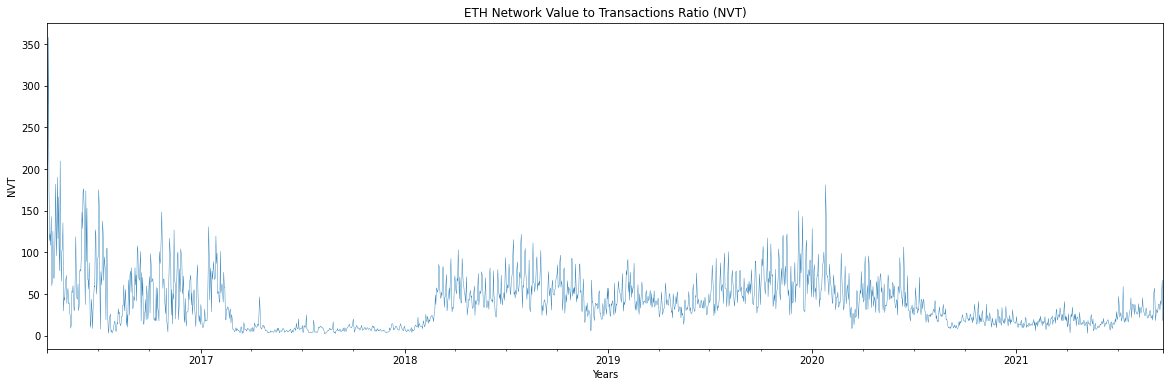

In [6]:
eth_plot = eth_df['nvt'].plot(linewidth = .4, figsize = (20,6))
eth_plot.set_xlabel('Years')
eth_plot.set_ylabel('NVT')
eth_plot.set_title('ETH Network Value to Transactions Ratio (NVT)')

eth_plot

<AxesSubplot:title={'center':'BTC Network Value to Transactions Ratio (NVT)'}, xlabel='Years', ylabel='NVT'>

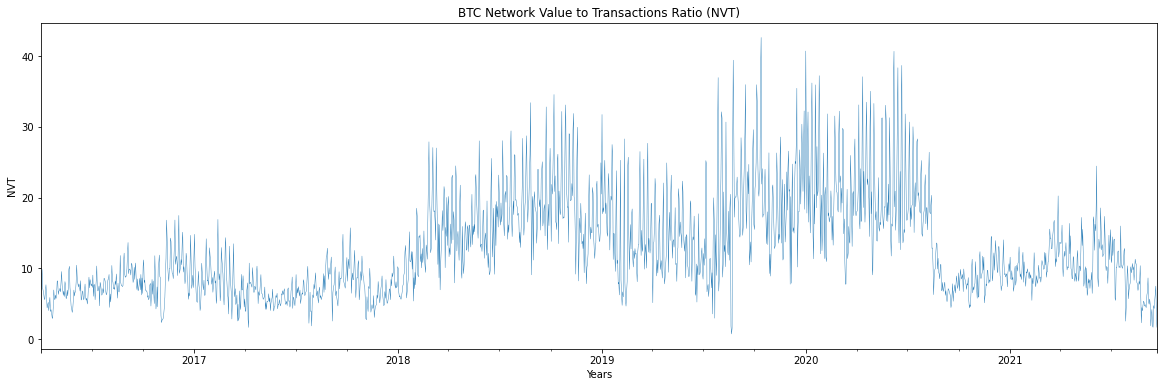

In [7]:
btc_plot = btc_df['nvt'].plot(linewidth = .4, figsize = (20,6))
btc_plot.set_xlabel('Years')
btc_plot.set_ylabel('NVT')
btc_plot.set_title('BTC Network Value to Transactions Ratio (NVT)')

btc_plot

## Compare Multiple Coins

<AxesSubplot:title={'center':'BTC and ETH Network Value to Transactions Ratio (NVT)'}, xlabel='Years', ylabel='NVT'>

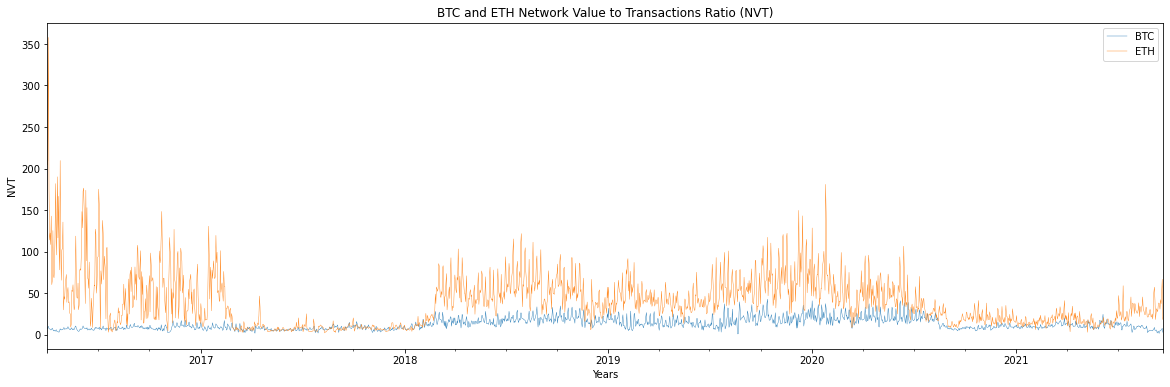

In [18]:
coin_list = ['BTC', 'ETH']
nvt_df = pd.DataFrame()

for coin in coin_list:
    df = calc_nvt(coin)
    nvt_df[coin] = df['nvt']

compared = nvt_df.plot(linewidth = .4, figsize = (20,6))
compared.set_xlabel('Years')
compared.set_ylabel('NVT')
compared.set_title('BTC and ETH Network Value to Transactions Ratio (NVT)')
compared

## NVT Ratio and Network Valuation

Text(0, 0.5, 'NVT Ratio')

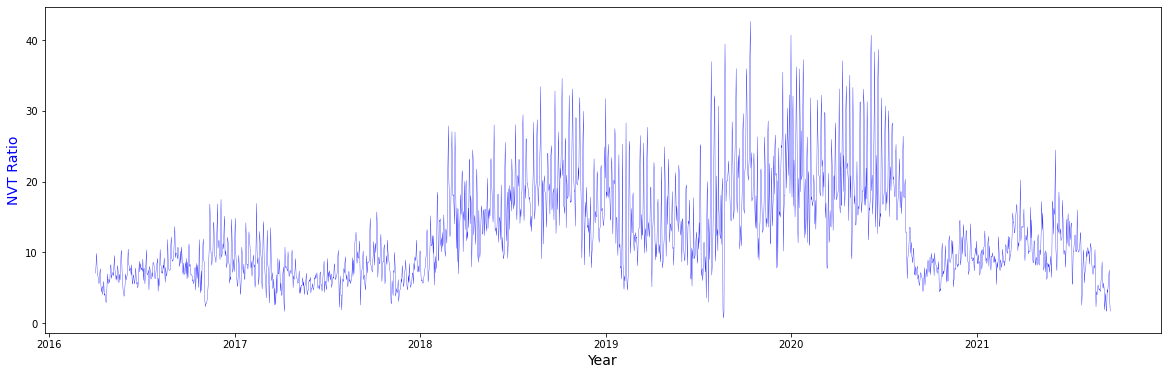

In [19]:
fig, chart = plt.subplots(figsize = (20,6))

chart.plot(btc_df.index.values, btc_df.nvt, color = "blue", linewidth = .3)

chart.set_xlabel("Year", fontsize = 14)
chart.set_ylabel("NVT Ratio", color = "blue", fontsize = 14)

In [21]:
chart2 = chart.twinx()
chart2.plot(btc_df.index.values, btc_df["close"], color = "orange", linewidth = .3)

chart2.set_ylabel("Closing Prices", color = "orange", fontsize = 14)

plt.show()

fig.savefig('NVT_Ratios/btc_nvt_price.jpg',
            format = 'jpeg',
            dpi = 100,
            bbox_inches = 'tight')

Text(0, 0.5, 'NVT Ratio')

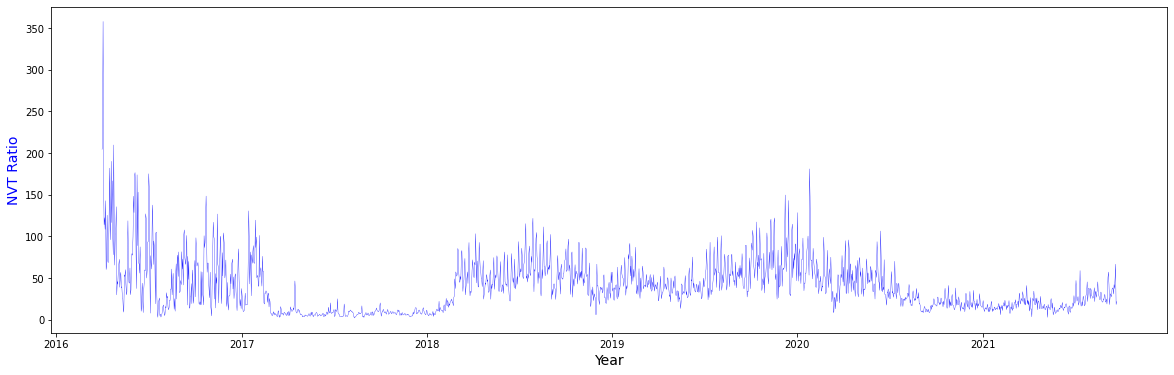

In [15]:
fig, charte = plt.subplots(figsize = (20,6))

charte.plot(eth_df.index.values, eth_df.nvt, color = "blue", linewidth = .3)

charte.set_xlabel("Year", fontsize = 14)
charte.set_ylabel("NVT Ratio", color = "blue", fontsize = 14)

In [17]:
chart2e = charte.twinx()
chart2e.plot(eth_df.index.values, eth_df["close"], color = "orange", linewidth = .3)

chart2e.set_ylabel("Closing Prices", color = "orange", fontsize = 14)

plt.show()

fig.savefig('NVT_Ratios/eth_nvt_price.jpg',
            format = 'jpeg',
            dpi = 100,
            bbox_inches = 'tight')